# Análise de Posição

Professor Paulo Victor

---
**Atenção:**

Este material serve apenas como um guia para estudos e para as aulas, não substituindo a leitura dos livros indicados e é de uso exclusivo dos alunos do CEFET/RJ campus Angra dos Reis.

---

O objetivo da análise de posição é: 

* Determinar a configuração (pose) do mecanismo para uma entrada específica, ou para um conjunto de entradas no caso de sistemas com mais de um grau de liberdade.

Nesta disciplinas, consideraremos apenas sistemas planares (mecanismos em 2D).

A análise de posição pode ser feita por:

* Métodos gráficos, ou trigonométricos;
* Métodos algébricos (analíticos).

## Método Gráfico/Trigonométrico

In [6]:
from IPython.display import Image

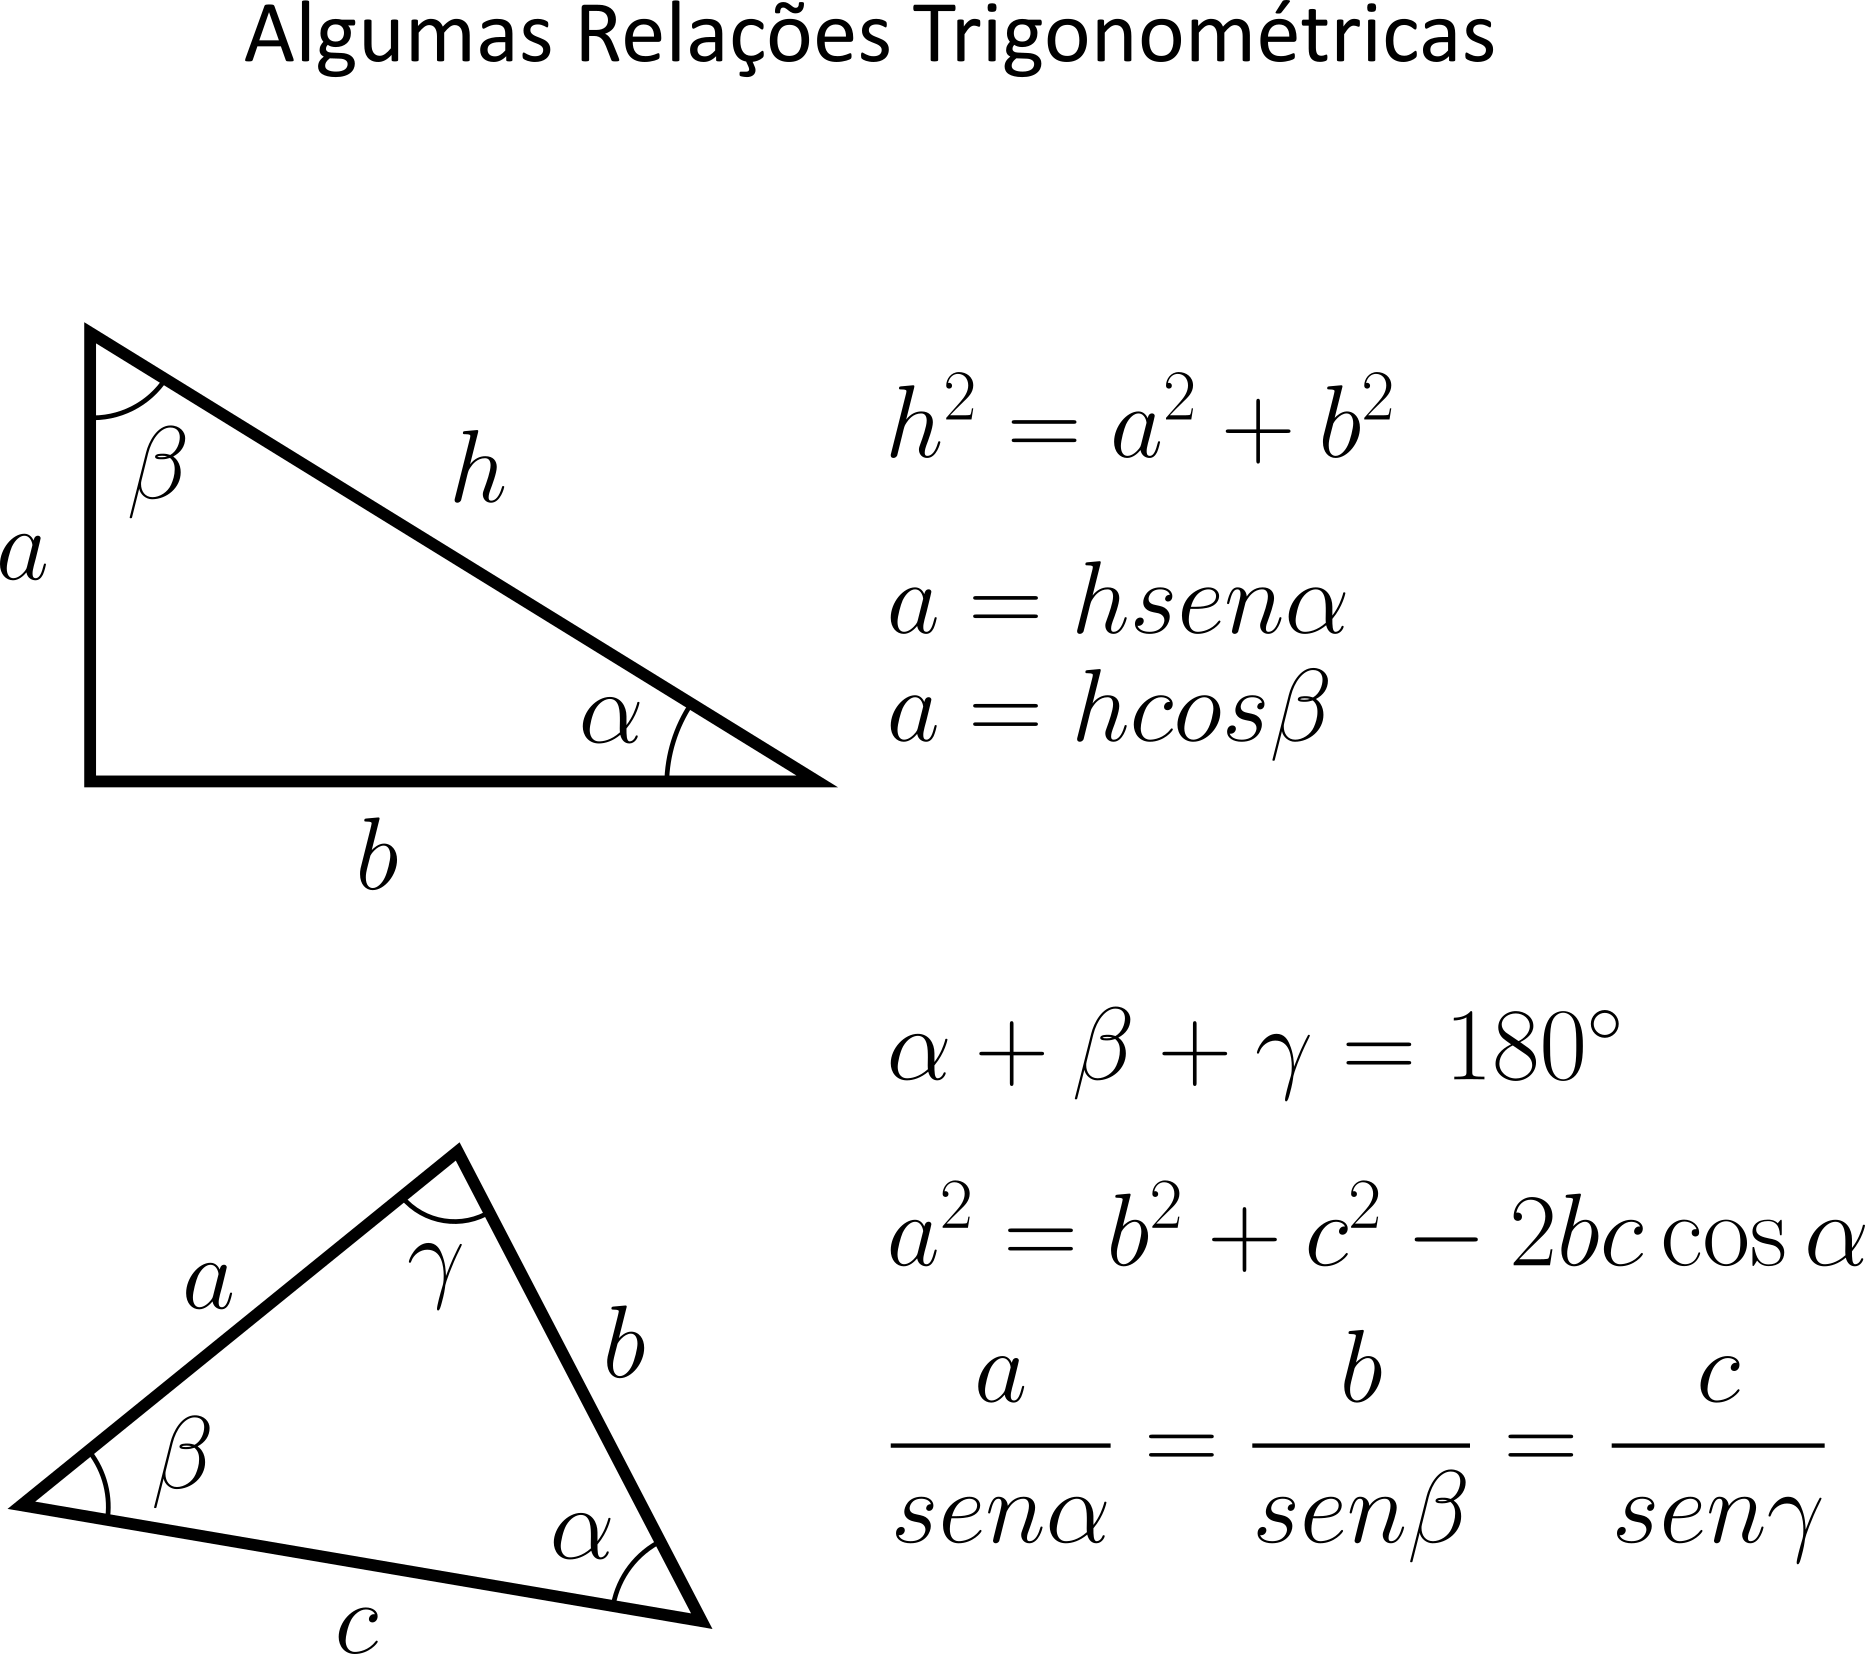

In [7]:
Image('figuras/trig.png',width=500)

**Exemplo:** 

Obtenha os ângulos $\theta_3$ e $\theta_4$ e a posição do ponto $B$ para um mecanismo de 4 barras com as seguintes dimensões: $a$ = 90mm, $b$ = 140mm, $c$ = 120mm, $d$ = 140mm. 

Considere um ângulo de entrada $\theta_2$ = 30${}^{\circ}$.



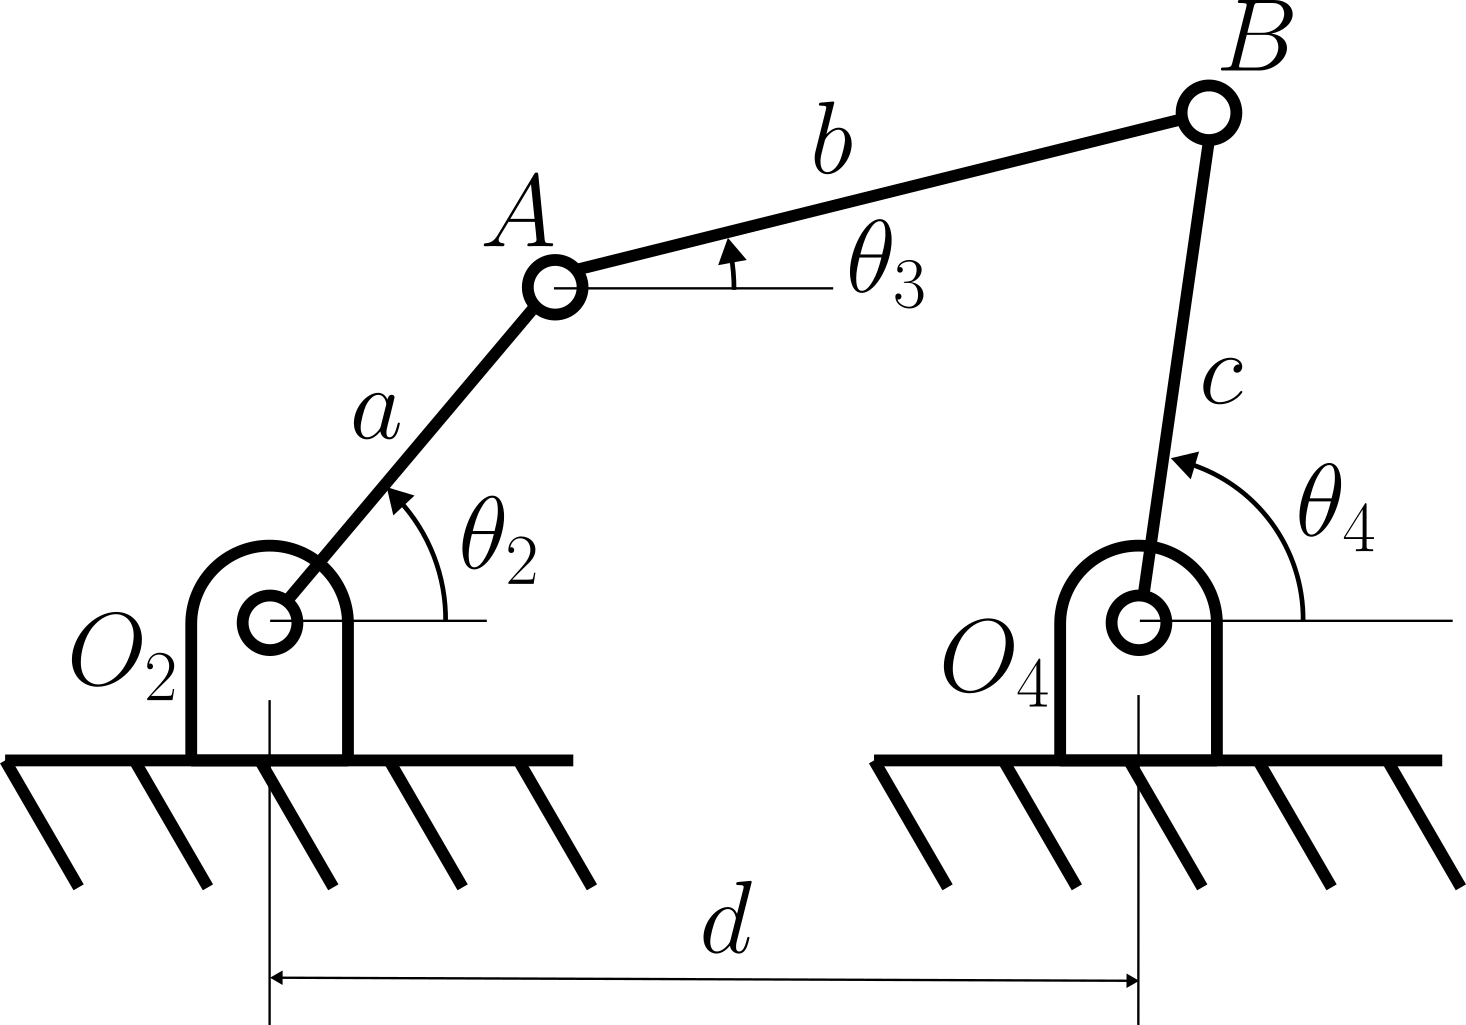

In [9]:
Image('figuras/4barras-ex.png',width=500)

### Vetor Posição

O vetor posição descreve a localização do Ponto $P$ em relação ao ponto $O$. 

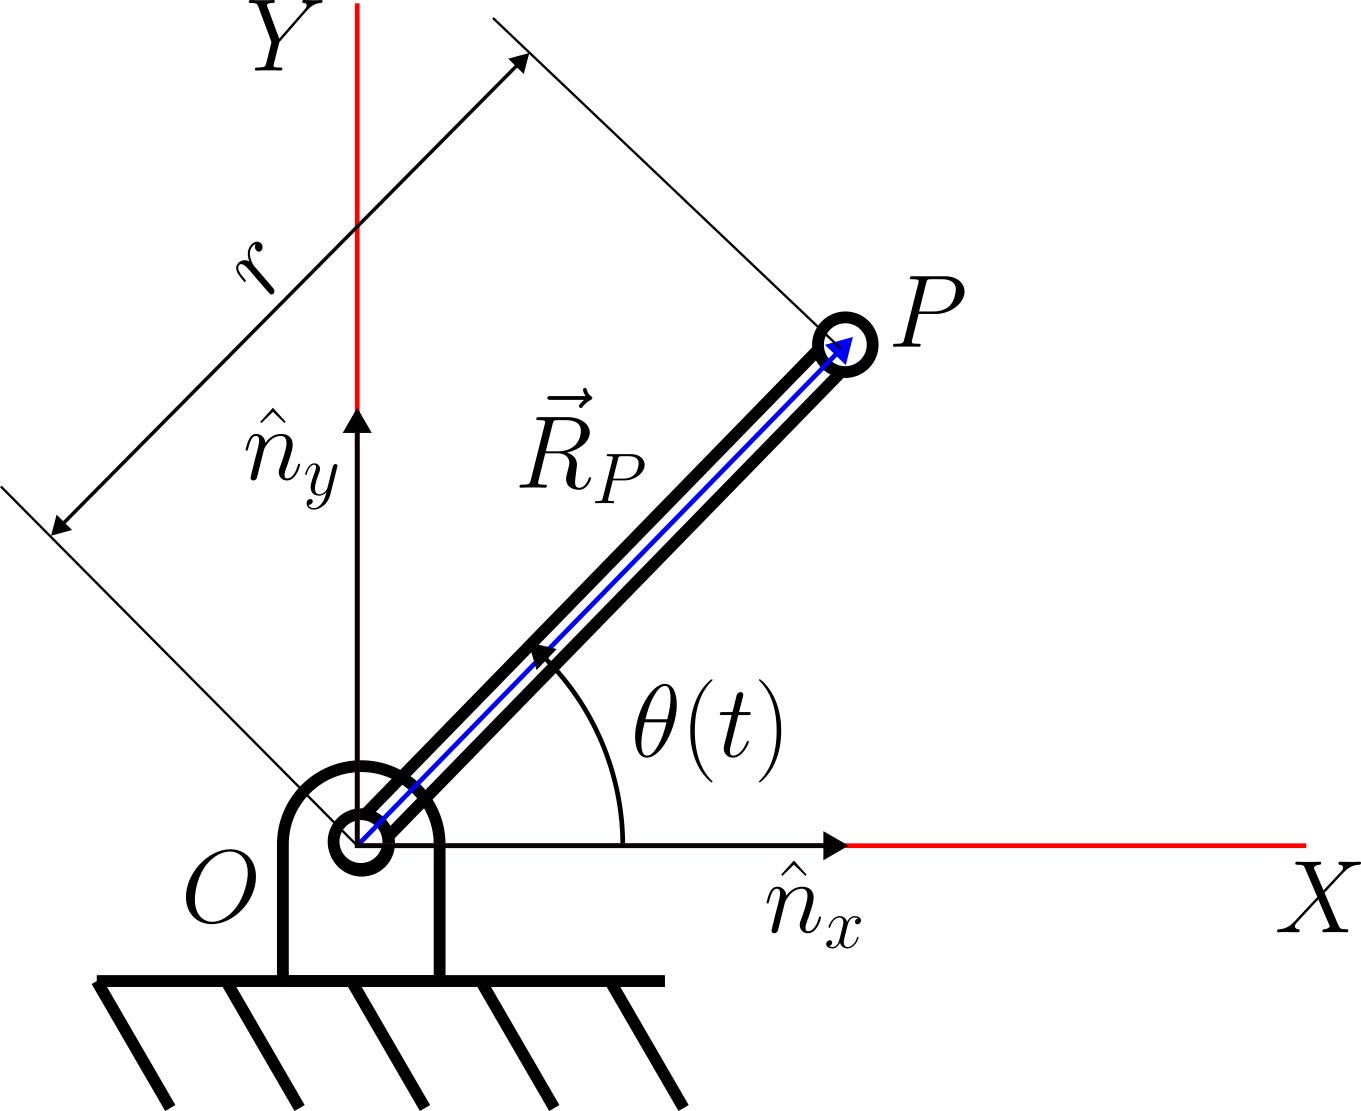

In [12]:
Image('figuras/RP.png',width=500)

O vetor posição do ponto $P$ em relação ao ponto $O$ é representado por: $\vec{R}_{PO}$

Como o ponto $O$ é um ponto fixo e é a origem do sistema de coordenadas, este vetor pode ser escrito como: $\vec{R}_P$

Uma maneira conveniente de se escrever o vetor $\vec{R}_P$ é através de coordenadas polares: $r \angle \theta(t)$

$\vec{R}_P = r cos \theta(t) \hat{n}_x + r sen \theta(t) \hat{n}_y$

Nesta disciplina, por lidarmos apenas com sistemas em 2D, iremos utilizar a representação de vetores no plano complexo. 

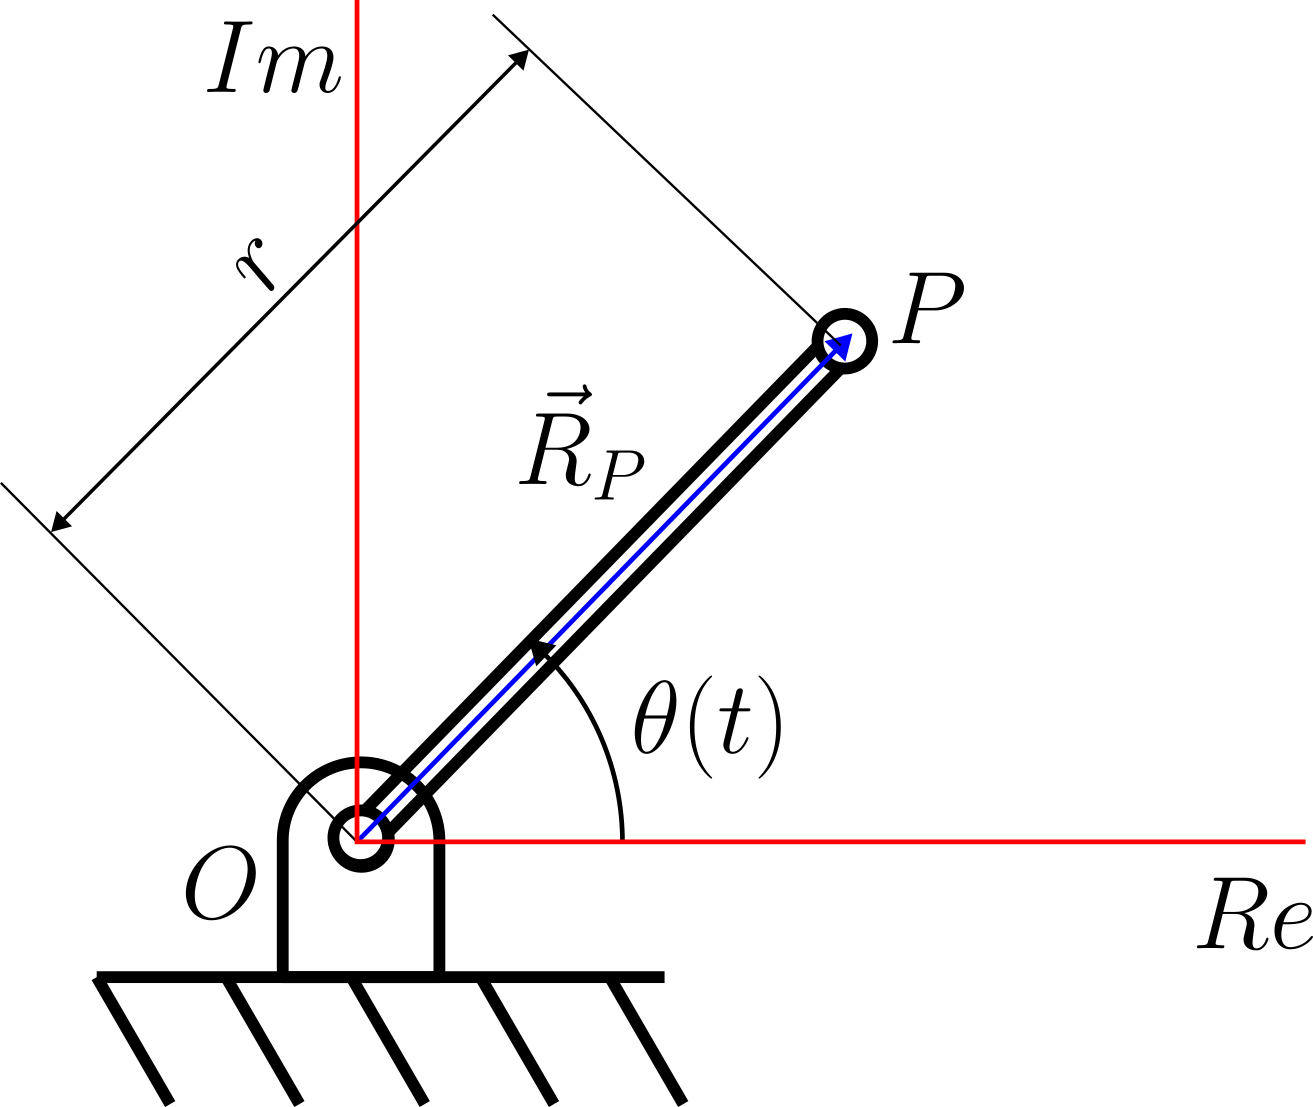

In [16]:
Image('figuras/RP_im.png',width=500)

$\vec{R}_P = r cos \theta(t) + i r sen \theta(t)$

Utilizando a Identidade de Euler:

$\vec{R}_P = r e^{i \theta(t)}$



### Malha de Vetores